# Visualización e interacción  

La visualización e interacción es un requerimiento actual para las nuevas metodologías de enseñanza, donde se busca un aprendizaje mucho más visual y que permita, a través de la experimentación, el entendimiento de un fenómeno cuando se cambian ciertas condiciones iniciales.  

La ubicación espacial y la manipulación de parámetros en dicha experimentación se puede facilitar con herramientas como estas, que integran el uso de gráficos, animaciones y _widgets_.  Este notebook, define los métodos de visualización e interacción que se usarán en otros _notebooks_, sobre la componente numérica y conceptual.  

Esta separación se hace con el fin de distinguir claramente 3 componentes del proceso, y que faciliten la comprensión de la temática sin requerir que el usuario comprenda los 3 niveles (ya que el código es visible, y esto impactaría en el proceso de seguimiento del tema).  

## Funciones Matemáticas  

Aunque no es parte de la visualización y de la interacción, el manejo de funciones matemáticas es requerido para estas etapas y las posteriores. Por lo que su definición es necesaria desde el principio para no ser redundante en requerir de múltiples invocaciones.  

La evaluación de funciones matemáticas puede realizarse por medio del modulo `math` que hace parte de la biblioteca estandar de Python, o con la biblioteca `numpy`. Para el conjunto limitado de funciones matemáticas que requerimos y con la premisa de no realizar de formas complejas nuestros códigos, las utilidades de `numpy` no serán necesarias y con `math` y el uso de listas será suficiente.  

El motivo de tener pocos requerimientos de funciones matemáticas es por el uso de métodos numéricos y no de herramientas análiticas. La idea es mostrar como con esta metodología es posible analizar un conjunto mayor de problemas sin tener que profundizar en una gran cantidad de herramientas matemáticas y así no limitar la discusión de estos temas a conocimientos avanzados de matemáticas, y más bien depender de un conocimiento básico tanto de matemáticas como de programación para el desarrollo de los problemas, y permitir simplemente la interacción en caso de solo usar estos notebooks como un recurso para el estudio conceptual. Por este último fin, se busca que el notebook conceptual posea el mínimo de código, y este se lleve sobre los notebooks de técnicas numéricas y de visualización.  

In [1]:
from math import sin, cos, tan, sqrt, log, exp, pi

El conjunto anterior de funciones sólo se indica por mantener una referencia de funciones para cualquier ampliación que se desee realizar sobre este, y para su uso en la creación de potenciales arbitrarios, así como en los casos de ejemplificación con funciones análiticas o para fines de comparación de resultados.    

Para la implementación (partiendo de un potencial dado numéricamente), sólo se requiere del uso de `sqrt`.  

El modulo de `numpy` permitiría extender la aplicación de funciones matemáticas directamente sobre arreglos numéricos, y definir estos arreglos de una forma natural para la matemática, como equivalente a los vectores y matrices a traves de la clase `array`. 

## Interacción 

Existen multiples mecanismos para interacción con los recursos digitales, definidos de forma casi estándar en su comportamiento a través de distintas plataformas.  

Dentro de la definición de los controles gráficos (_widgets_) incorporados en __Jupyter__ en el módulo `ipywidgets`, encontramos los siguientes:  

In [2]:
import ipywidgets
print(dir(ipywidgets))

['Accordion', 'BoundedFloatText', 'BoundedIntText', 'Box', 'Button', 'ButtonStyle', 'CallbackDispatcher', 'Checkbox', 'Color', 'ColorPicker', 'Controller', 'CoreWidget', 'DOMWidget', 'DatePicker', 'Datetime', 'Dropdown', 'FloatProgress', 'FloatRangeSlider', 'FloatSlider', 'FloatText', 'HBox', 'HTML', 'HTMLMath', 'Image', 'IntProgress', 'IntRangeSlider', 'IntSlider', 'IntText', 'Label', 'Layout', 'NumberFormat', 'Output', 'Password', 'Play', 'RadioButtons', 'Select', 'SelectMultiple', 'SelectionRangeSlider', 'SelectionSlider', 'SliderStyle', 'Style', 'Tab', 'Text', 'Textarea', 'ToggleButton', 'ToggleButtons', 'ToggleButtonsStyle', 'VBox', 'Valid', 'ValueWidget', 'Widget', '__builtins__', '__cached__', '__doc__', '__file__', '__jupyter_widgets_base_version__', '__jupyter_widgets_controls_version__', '__loader__', '__name__', '__package__', '__path__', '__protocol_version__', '__spec__', '__version__', '_handle_ipython', '_version', 'domwidget', 'fixed', 'get_ipython', 'handle_kernel', 'i

Para nuestro uso, serán de uso principal:

* Interacciones: Son mecanismos automáticos para crear controles y asociarlos a una función. `interact`, `interactive`.  
* Deslizadores: Los hay específicos para tipos de datos, y estos son `IntSlider` y `FloatSlider`.  
* Botones: Elementos que permiten ejecutar una acción al presionarlos, `Button`.  
* Texto: Permiten el ingreso de texto arbitrario y asociar la ejecución de una acción a su ingreso. `Text`.  
* Contenedores: Permiten agrupar en un solo objeto/vista varios controles. Uno de ellos es `Box`.  

In [3]:
from ipywidgets import interact, interactive, fixed, IntSlider, FloatSlider, Button, Text, Box

Entre estos controles que se usan, a veces es necesario crear dependencias de sus rangos respecto al rango o propiedad de otro control. Para este fin usamos la función `link` del módulo `traitlets`. En este módulo se encuentran otras funciones utiles para manipulación de los controles gráficos.

In [4]:
from traitlets import link

Tambien es necesario el uso de elementos que permitan el formato del documento y visualización de elementos y texto enriquecido, fuera de lo posible con texto plano a punta de `print` o con las capacidades de [_MarkDown_](https://daringfireball.net/projects/markdown/) ([Nativo](http://jupyter-notebook.readthedocs.org/en/latest/examples/Notebook/rstversions/Working%20With%20Markdown%20Cells.html) o con [extensión](https://github.com/ipython-contrib/IPython-notebook-extensions/wiki/python-markdown)). Para esto se puede extender el uso métodos para renderizado HTML y LaTeX.  

In [5]:
from IPython.display import clear_output, display, HTML, Latex, Markdown, Math

## Visualización  

Por visualización entendemos las estrategias de representación gráfica de la información, resultados o modelos. Facilita la lectura rápida de datos mediante codificaciones de colores así como la ubicación espacial de los mismos. La representación gráfica no tiene por qué ser estática, y es ahí donde las animaciones nos permiten representar las variaciones temporales de un sistema de una forma más natural (no como un gráfico respecto a un eje de tiempo, sino vivenciando un gráfico evolucionando en el tiempo).  

Para este fin es posible usar diversas bibliotecas existentes en python (en sus versiones 2 y 3), siendo la más común de ellas y robusta, la biblioteca [Matplotlib](http://matplotlib.org/). En el contexto moderno de los navegadores web, es posible integrar de una forma más natural bibliotecas que realizan el almacenamiento de los gráficos en formatos nativos para la web, como lo es el formato de intercambio de datos [JSON](http://www.json.org/), facilitando su interacción en el navegador mediante llamados a [javascript](https://en.wikipedia.org/wiki/JavaScript).  

Así, podemos establecer preferencias, como Matplotlib para uso estático principalmente o para uso local, mientras que para interacción web, usar bibliotecas como [Bokeh](http://bokeh.pydata.org/en/latest/).  

Para este caso, sin profundidad en la interacción web, se usará Matplotlib.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

Para indicar la graficación no interactiva embebida en el documento usamos la sguiente linea

```
%matplotlib inline
```

En caso de requerir una forma interactiva embebida, se usa la linea

```
%matplotlib notebook
```

Para nuestro uso básico, todo lo necesario para gráficación se encuentra en el módulo `pyplot` de Matplotlib. Con él podemos realizar cuadrículas, trazos de curvas de diversos estilos, modificación de ejes, leyendas, adición de anotaciones en el gráfico y llenado de formas (coloreado entre curvas). Pueden consultarse ejemplos de referencia en la [galería](http://matplotlib.org/gallery.html) de Matplotlib y en la lista de [ejemplos](http://matplotlib.org/examples/index.html) de la página oficial.

### Graficación de funciones  

En general nuestro ideal es poder graficar funciones que son representadas por arreglos numéricos. Las funciones continuas en su representación algebraica de discretizan, y es el conjunto de puntos interpolado lo que se ilustra. Antes de discretizar, es conveniente convertir nuestra función en una función evaluable, y asociar la dependencia solo a una variable (para nuestro caso que es 1D).

El proceso de interpolación mencionado se realiza por el paquete de graficación y nosotros solo debemos indicar los puntos que pertenecen a la función.  

In [7]:
def discretizar(funcion, a, b, n):
    dx = (b-a)/n
    x = [a + i*dx for i in range(n+1)]
    y = [funcion(i) for i in x]
    return x, y

def graficar_funcion(x, f):
    plt.plot(x, f, '-')
    
def graficar_punto_texto(x, f, texto):
    plt.plot(x, f, 'o')
    plt.text(x+.2, f+.2, texto)

In [8]:
def int_raiz_sin(a:(-5.,0., .2), b:(0., 5., .2), k:(0.2, 10., .1), n:(1, 100, 1), N:(0, 10, 1)):
    f = lambda x: sin(k*x)
    x, y = discretizar(f, a, b, n)
    r = pi*(N + int(a*k/pi))/k
    graficar_funcion(x, y)
    graficar_punto_texto(r, 0, 'Raíz')
    plt.show()
    
interact(int_raiz_sin)

A Jupyter Widget

<function __main__.int_raiz_sin>

El bloque anterior de código ilustra el uso de `interact` como mecanismo para crear controles automaticos que se apliquen a la ejecución de una función. Este permite crear de una forma simple las interacciones cuando no se requiere de personalizar mucho, ni vincular controles y se desea una ejecución automatica con cada variación de parametros. En caso de querer recuperar los valores especificos de los parametros para posterior manipulación se recomienda el uso de `interactive` o del uso explicito de los controles.  

A pesar de la facilidad que ofrece `interact` e `interactive` al generar los controles automaticos, esto es poco conveniente cuando se trata de ejecuciones que toman tiempos significativos (que para escalas de una interacción favorable, un tiempo significativo son aquellos mayores a un segundo), ya que cada variación de parametros independiente, o sea, cada deslizador en este caso, al cambiar produce una nueva ejecución, y las nuevas variaciones de parámetros quedan en espera hasta terminar las ejecuciones de las variaciones individuales anteriores.  

Es por esto, que puede ser conveniente definir una interacción donde los controles la unica acción que posean es la variación y almacenamiento de valores de los parametros, y sea otro control adicional el designado para indicar el momento de actualizar parametros y ejecutar.  

El ejemplo anterior se puede construir usando `FloatSlider`, `IntSlider`, `Button`, `Text`, `Box` y `display`.  

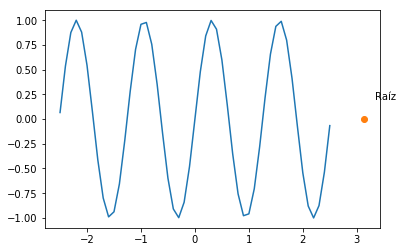

In [9]:
def raiz_sin(a, b, k, n, N, texto):
    f = lambda x: sin(k*x)
    x, y = discretizar(f, a, b, n)
    r = pi*(N + int(a*k/pi))/k
    graficar_funcion(x, y)
    graficar_punto_texto(r, 0, texto)

a = FloatSlider(value= -2.5, min=-5., max= 0., step= .2, description='a')
b= FloatSlider(value = 2.5, min=0., max= 5., step=.2, description='b')
k= FloatSlider(value = 5., min=0.2, max=10., step=.1, description='k')
n= IntSlider(value= 50, min=1, max= 100, step=1, description='n')
N= IntSlider(value=5, min=0, max=10, step=1, description='N')
texto = Text(value='Raíz', description='Texto punto')
Boton_graficar = Button(description='Graficar')

def click_graficar(boton):
    clear_output(wait=True)
    raiz_sin(a.value, b.value, k.value, n.value, N.value, texto.value)
    plt.show()

display(a, b, k, n, N, texto, Boton_graficar)
Boton_graficar.on_click(click_graficar)

### Graficación de potenciales  

Para fines de ilustración y comprensión de los estados ligados del sistema, conviene poder ilustrar las funciones de potencial como barreras físicas. Esta noción gráfica se representa mediante el llenado entre la curva y el eje de referencia para la energía. De esta forma, al unir el gráfico con la referencia del autovalor, será claro que la energía hallada pertenece al intervalo requerido en teoría y que corresponde a un sistema ligado.  

La función de graficación del potencial recibe dos listas/arreglos, uno con la información espacial y otro con la evaluación del potencial en dichos puntos. Antes de proceder con el llenado de la representación de la barrera del potencial, se crean los puntos inicial y final con el fin de crear formas cerradas distinguibles para el comando `fill`.

In [10]:
def graficar_potencial(x, V_x):
    V_min = min(V_x)
    plt.fill_between(x, V_min, V_x, facecolor = 'peru')

A continuación se presenta un ejemplo interactivo de graficación del potencial finito. Se inicia con la definición del potencial, la cual se usa para generar un arreglo con la información de la evaluación del potencial en distintos puntos del espacio.

In [11]:
def potencial(V_0, a, x):
    if abs(x) > a/2:
        return V_0
    else:
        return 0

def int_potencial(V_0:(.1, 10., .1), a:(.1, 5, .1), L:(1., 10., .5), N:(10, 200, 10)):
    dx = L / N
    x = [-L/2 + i*dx for i in range(N+1)]
    y = [potencial(V_0, a, i) for i in x]
    graficar_potencial(x, y)
    plt.show()

interact(int_potencial)

A Jupyter Widget

<function __main__.int_potencial>

### Nivel de energía  

Para ilustrar adecuadamente la presencia de estados ligados conviene superponer sobre la representación de la función de potencial, la referencia de energía del autovalor del sistema. Para distinguirlo, éste será un trazo discontinuo (no relleno para evitar confusión con el potencial, pero tampoco continuo para distinguirlo de la representación de las funciones de onda).  

\begin{eqnarray}
E \leq V_\text{máx},& \qquad \text{Estado ligado}\\
E > V_\text{máx},& \qquad \text{Estado no ligado}
\end{eqnarray}

Los estados no ligados son equivalentes a tener particulas libres.  

In [12]:
def graficar_autovalor(L, E):
    plt.plot([-L/2, L/2], [E, E], '--')

In [13]:
def int_potencial_energia(V_0:(.1, 10., .1), E:(.1, 10., .1), a:(.1, 5, .1), L:(1., 10., .5), N:(10, 200, 10)):
    dx = L / N
    x = [-L/2 + i*dx for i in range(N+1)]
    y = [potencial(V_0, a, i) for i in x]
    graficar_potencial(x, y)
    graficar_autovalor(L, E)
    if E > V_0:
        plt.text(0, E+0.2, 'No ligado')
    else:
        plt.text(0, E+0.2, 'Ligado')
    plt.show()
    
interact(int_potencial_energia)

A Jupyter Widget

<function __main__.int_potencial_energia>

### Graficación de autofunciones  

La visualización de las autofunciones (y su módulo cuadrado), nos permite reconocer visualmente la distribución de probabilidad del sistema e identificar los puntos espaciales más probables para la ubicación de la particula analizada.

Para la correcta visualización, la graficación de la función de onda debe considerar una normalización de escala, no necesariamente al valor de la unidad del eje, pero si como referencia un valor numerico comprendido por los valores máximos de potencial, que corresponden a la parte del gráfico más cercana al margen superior del recuadro de graficación. El no realizar este reescalamiento, podría afectar la visualización del potencial y de la energía, ya que el eje se reajusta a los datos máximos y mínimos.  

$$ \psi^{\prime}(x) = \frac{\psi(x)}{\max \psi(x)} V_\text{máx} $$

La graficación de las autofunciones es mediante el comando `plot` tradicional, y solo tiene de elemento adicional su reescalamiento con base al potencial máximo en la región de interes.

In [14]:
def graficar_autofuncion(x, psi_x, V_max):
    psi_max = max([abs(i) for i in psi_x])
    escala = V_max / psi_max
    psi_x = [i*escala for i in psi_x]
    plt.plot(x, psi_x, '-')

In [16]:
def onda(V_0, E, a, x):
    if abs(x) <= a/2:
        return cos(sqrt(E)*x/2)
    else:
        a2 = a/2
        k1 = sqrt(V_0 - E)
        A = cos(sqrt(E)*a2) / exp(-k1*a2)
        signo = abs(x)/x
        return A*exp(-signo*k1*x)

def int_potencial_auto_ef(V_0:(5., 20., .1), E:(.1, 20., .1), a:(2.5, 30., .1), L:(10., 100., 5.), N:(10, 200, 10)):
    dx = L / N
    x = [-L/2 + i*dx for i in range(N+1)]
    V = [potencial(V_0, a, i) for i in x]
    graficar_potencial(x, V)
    graficar_autovalor(L, E)
    if E > V_0:
        plt.text(0, E+0.2, 'No ligado')
    else:
        f = [onda(V_0, E, a, i) for i in x]
        graficar_autofuncion(x, f, V_0)
        plt.text(0, E+0.2, 'Ligado')
    plt.show()
    
interact(int_potencial_auto_ef)

A Jupyter Widget

<function __main__.int_potencial_auto_ef>